<a href="https://colab.research.google.com/github/Sohammhatre10/AstronomicalDataAnalysis/blob/main/AstronomicalDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*Astronomical Data Visualization*

Step-1: Import numpy and pandas for tabular transformation and feed the dataset

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv("https://drive.google.com/uc?id=1BQVc6MHjQFtDC9iP1isT_K4ojVe_Oil-")
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [3]:
print(df['Star color'].value_counts())

Red             116
Blue             56
Blue-White       41
Yellow-White     15
White            12
Name: Star color, dtype: int64


Step-2: Map the Star Type parameter for getting a hang of the dataset and its information about different types of stars

<ipython-input-58-88c76d789c2d>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


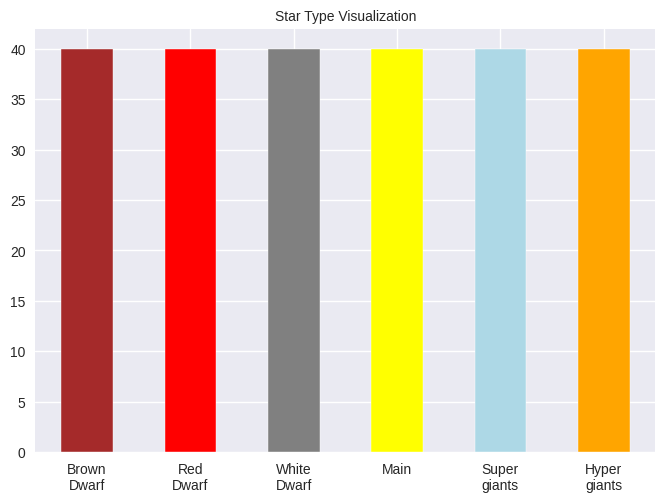

In [58]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
hist_star_col = df['Star type'].value_counts().plot(kind="bar", color=['brown', 'red', 'grey', 'yellow', 'lightblue', 'orange'])
plt.xticks(ticks=[i for i in range(len(set(df['Star type'])))],
           labels=["Brown\nDwarf", "Red\nDwarf", "White\nDwarf", "Main", "Super\ngiants", "Hyper\ngiants" ],
           rotation=0)
plt.title("Star Type Visualization", fontsize=10)
plt.savefig(baseDirectory+'Star_type_visualization')
plt.show()

Step-3: Creating a new diretory to save plots

In [5]:
import os
folder = 'plots'
os.makedirs(folder, exist_ok=True)
baseDirectory = f'/content/{folder}/'

Step-4 : Use Seaborn to make a bar chart of Star Colors

<ipython-input-56-a60df1e9f92e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Star color'].value_counts().index,


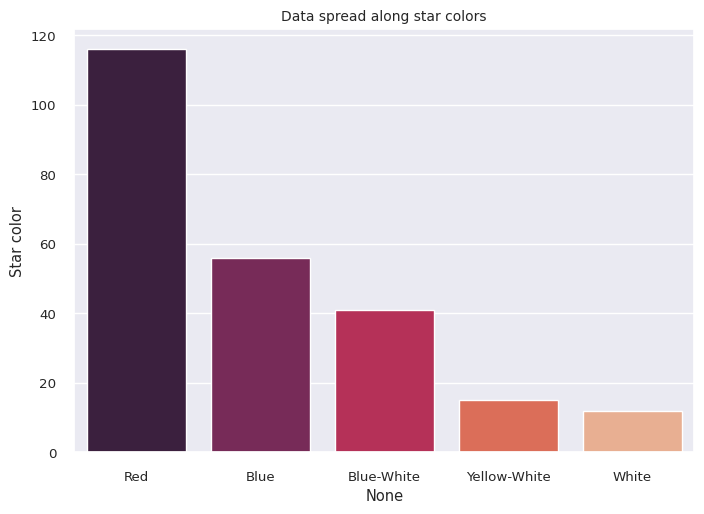

In [56]:
import seaborn as sns
sns.barplot(x=df['Star color'].value_counts().index,
            y=df["Star color"].value_counts(),
            palette="rocket")
plt.title("Data spread along star colors", fontsize=10)
plt.savefig(baseDirectory+'data_spread_along_star_colors')
plt.show()

Step-5: The remaining data will be plotted in a box plot using seaborn to get the range of data for each star color

<Figure size 800x550 with 0 Axes>

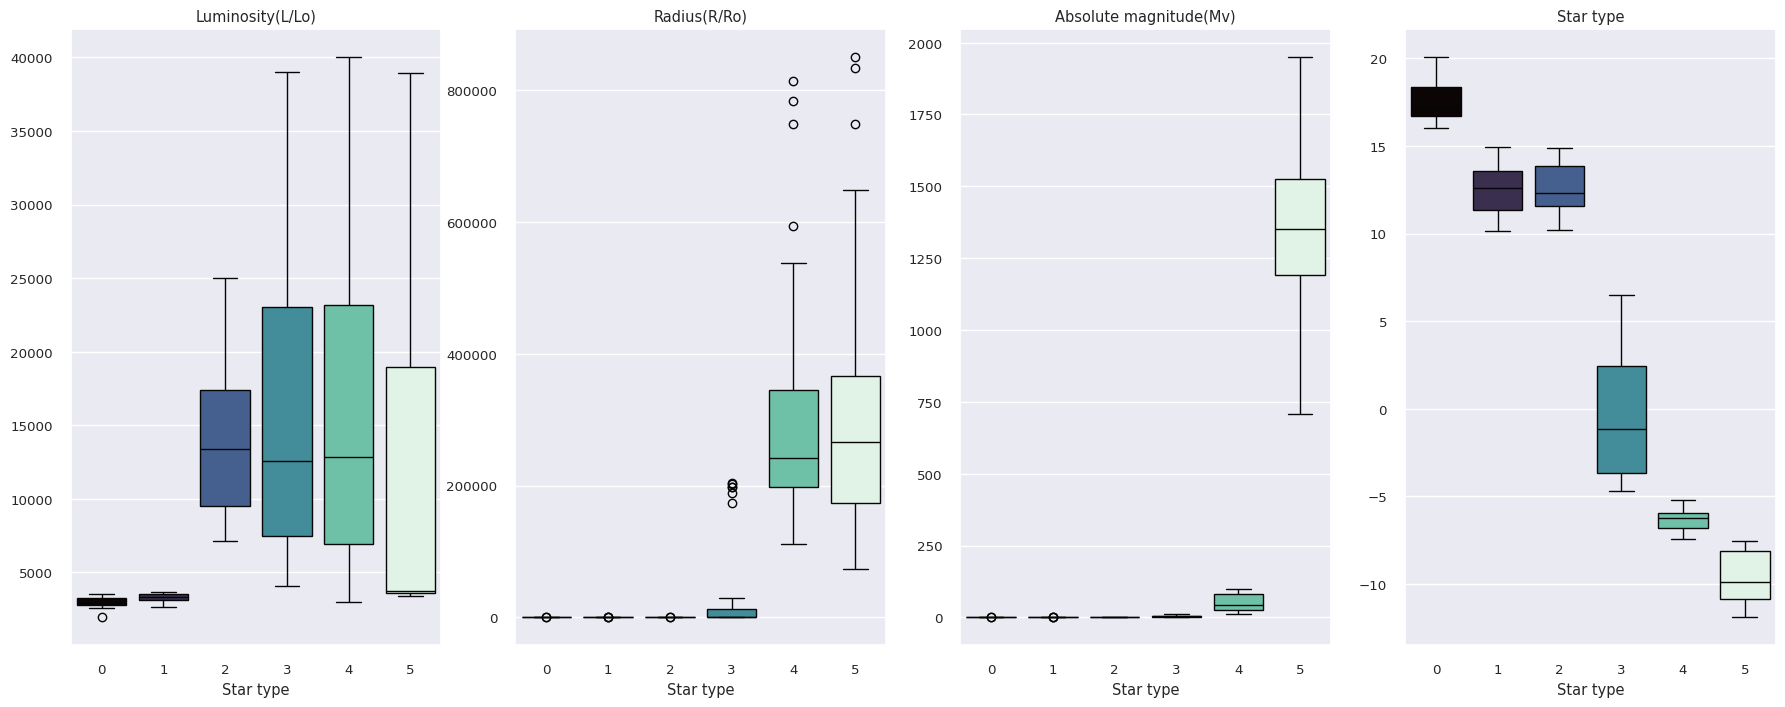

In [55]:
# The parameters again are y and x but this time we'll use the iloc feature and visualising using outliers
plt.suptitle("Visualizing data using outliers")
plt.figure(figsize=(22,8))
for i in range(1,5):
  plt.subplot(1,4,i)
  sns.boxplot(x=df['Star type'], y=df.iloc[:,i-1], palette='mako', hue=df["Star type"], legend=False)
  plt.title(f"{df.columns[i]}")
  plt.ylabel("")
plt.savefig(baseDirectory+"boxplot_star")

Step-6: Creating a scatter plot using the given data

<Figure size 800x550 with 0 Axes>

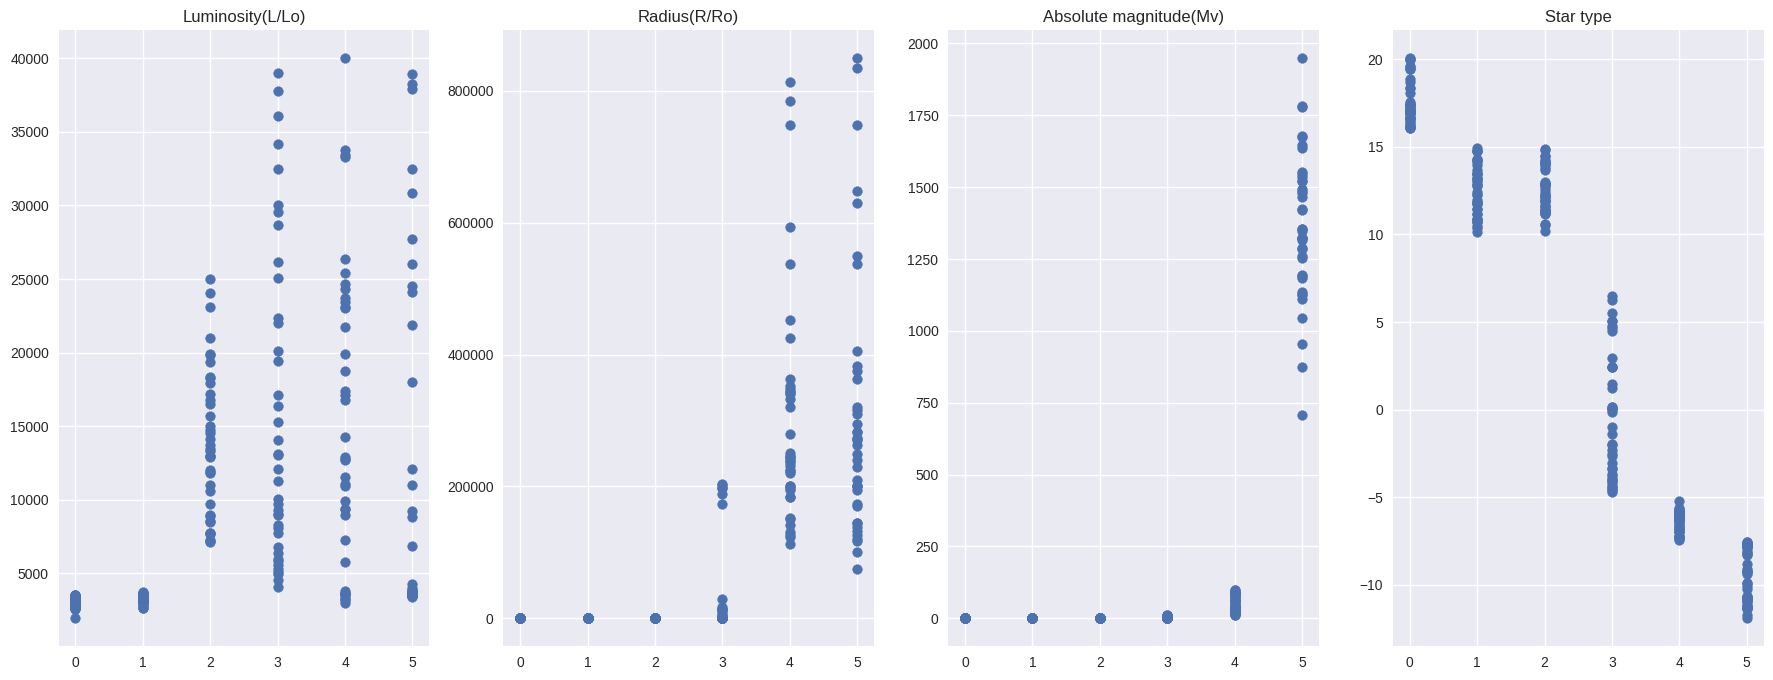

In [60]:
plt.suptitle("Visualizing data using scatter plot")
plt.figure(figsize=(22,8))
for i in range(1,5):
  plt.subplot(1,4,i)
  plt.scatter(x=df['Star type'], y=df.iloc[:,i-1])
  plt.title(f"{df.columns[i]}")
  plt.ylabel("")
plt.savefig(baseDirectory+"scatterplot_star")

Step-7: Creating a Pair Plot

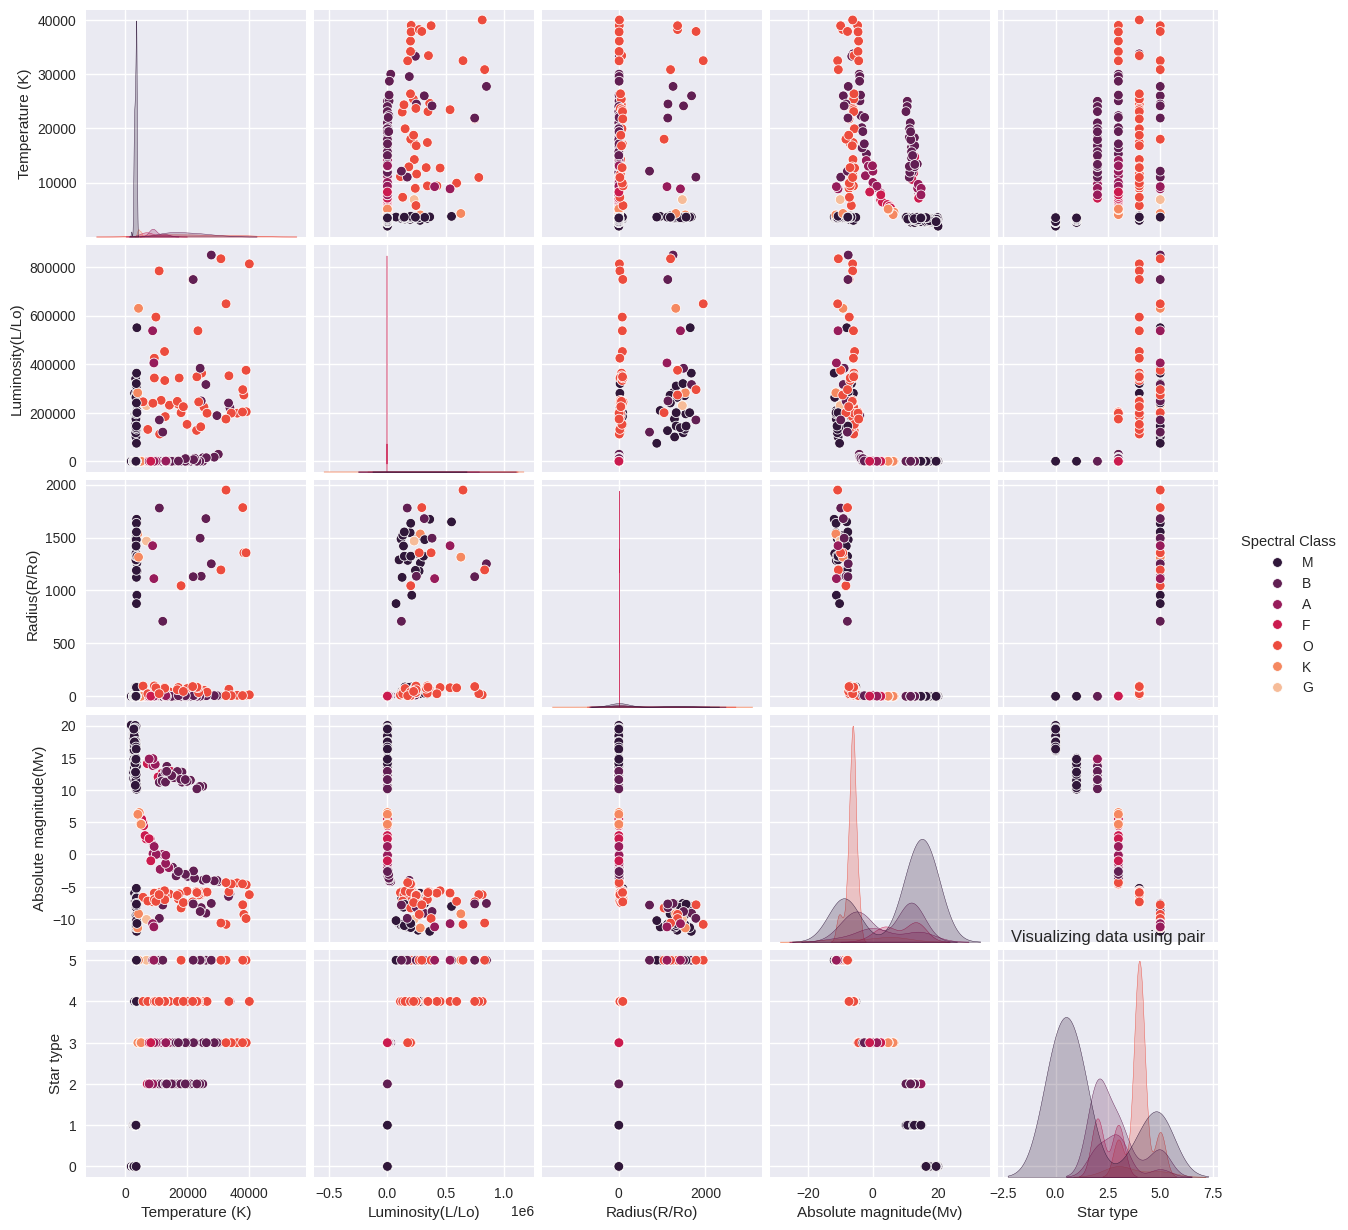

In [65]:
sns.pairplot(df, hue='Spectral Class', palette='rocket')
plt.title("Visualizing data using pair")
plt.savefig(baseDirectory+'pair_plot')

Step-8: Creating an HR Diagram


The H-R diagram is a useful tool for astronomers because it can be used to chart the life cycle of a star. It can also be used to study groups of stars in galaxies or clusters.
The H-R diagram plots the following two primary characteristics of a star:
Luminosity: The brightness or output of energy
Temperature: The average speed of moving particles

The Hertzsprung-Russell diagram (H-R diagram) is a scatter plot that shows the relationship between a star's absolute magnitude and its temperature. It's also known as the color-magnitude diagram.

Create a dictionary and store the attributes of the stars (colors, size, marker, label) in it and then create a scatter plot for every point

In [106]:
# creating an temperature vs abs magnitude plot
color = ['brown', 'red', 'white', 'cyan', 'orange', 'maroon']
labels = ["Brown Dwarf", "Red Dwarf", "White Dwarf", "Main", "Supergiants", "Hypergiants" ]
size = [30, 35, 40, 20, 100, 175]
star_attributes = dict()
length_df = len(df)
for i in range(6):
  star_attributes[i] = {
      'color': color[i],
      'labels': labels[i],
      'size': size[i]
  }
star_attributes

{0: {'color': 'brown', 'labels': 'Brown Dwarf', 'size': 30},
 1: {'color': 'red', 'labels': 'Red Dwarf', 'size': 35},
 2: {'color': 'white', 'labels': 'White Dwarf', 'size': 40},
 3: {'color': 'cyan', 'labels': 'Main', 'size': 20},
 4: {'color': 'orange', 'labels': 'Supergiants', 'size': 100},
 5: {'color': 'maroon', 'labels': 'Hypergiants', 'size': 175}}

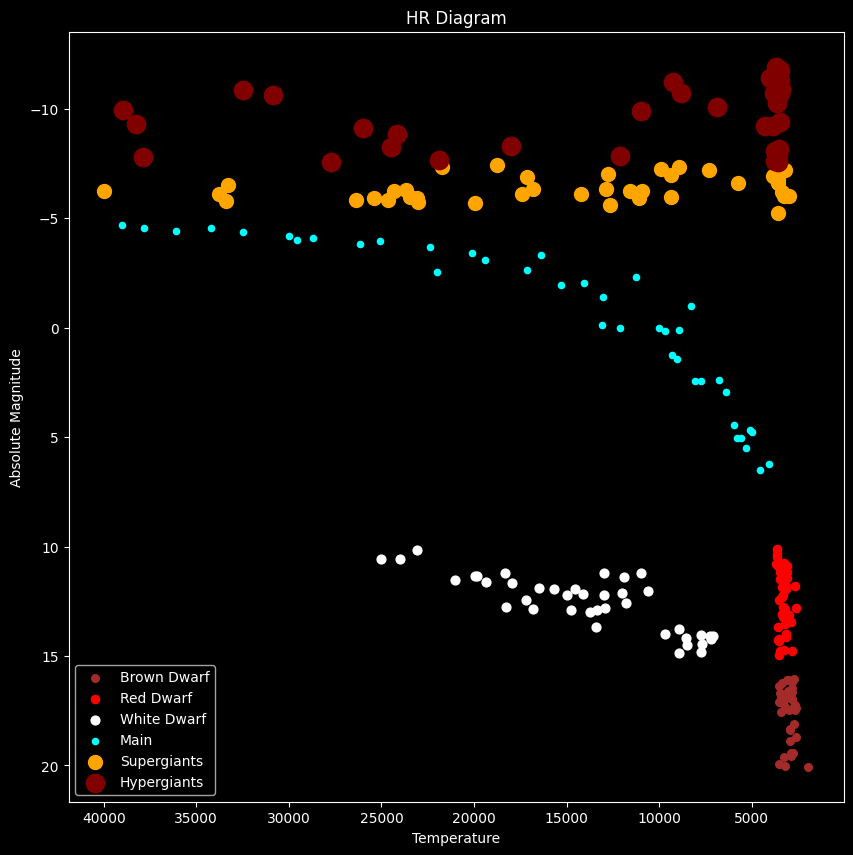

In [111]:
temp = df['Temperature (K)'].values
absmag = df['Absolute magnitude(Mv)'].values
star_type = df['Star type'].values
plt.style.use("dark_background")
plt.style.context('Solarize_Light2')
plt.figure(figsize=(10,10))
lab = set()
axes = []
for i in range(len(df)):
  attributes = star_attributes[star_type[i]]
  if attributes['labels'] not in lab:
    lab.add(attributes['labels'])
    ax = plt.scatter(temp[i], absmag[i],
                c=attributes['color'],
                s=attributes['size'],
                label = attributes['labels'])
    axes.append(ax)
  else:
    plt.scatter(temp[i], absmag[i],
                c=attributes['color'],
                s=attributes['size'],
                label = attributes['labels'])
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.title("HR Diagram")
plt.xlabel("Temperature")
plt.ylabel("Absolute Magnitude")
plt.legend(handles=axes)
plt.savefig(baseDirectory+"HRDiagram")
plt.show()

In [113]:
from google.colab import files
files.download("/content/plots")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>